In [1]:
!pip install control

In [2]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

### Nyquist plot (Polor plot) 그리기
\begin{align}
G_1(s) &= \frac{0.25}{s - 0.5} \\
G_2(s) &= \frac{0.5}{s - 0.5} \\
G_3(s) &= \frac{1.0}{s - 0.5}
\end{align}

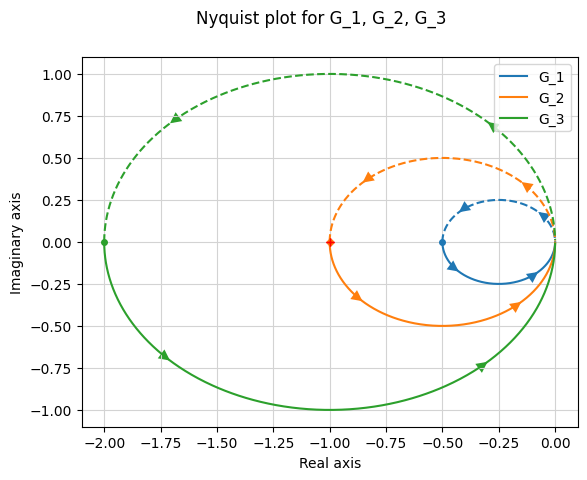

In [3]:
s=ctl.tf([1, 0], [1])
G_1 = 0.25/(s-0.5)
G_1.name='G_1'
G_2 = 0.5/(s-0.5)
G_2.name='G_2'
G_3 = 1.0/(s-0.5)
G_3.name='G_3'
fig1 = ctl.nyquist_plot(G_1)
fig2 = ctl.nyquist_plot(G_2)
fig3 = ctl.nyquist_plot(G_3)
plt.show()

### Bode plot 그리기
$$G(s) = \frac{1}{s^2 + 0.5s + 1}$$

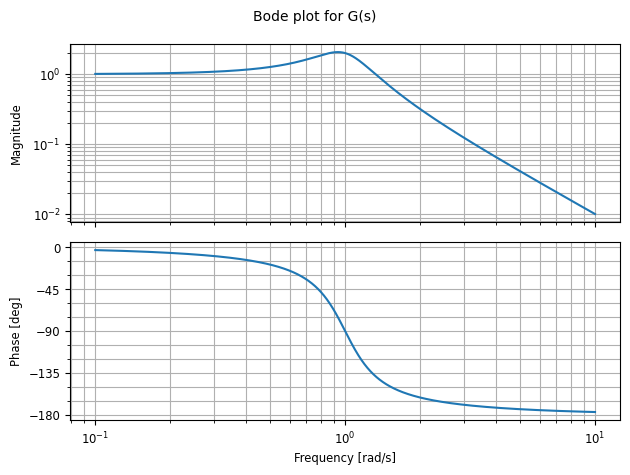

In [6]:
s = ctl.tf([1,0],[1])
G = 1/(s**2+0.5*s+1)
G.name='G(s)'
out = ctl.bode(G)

### Frequency response 시간축에서 확인하기

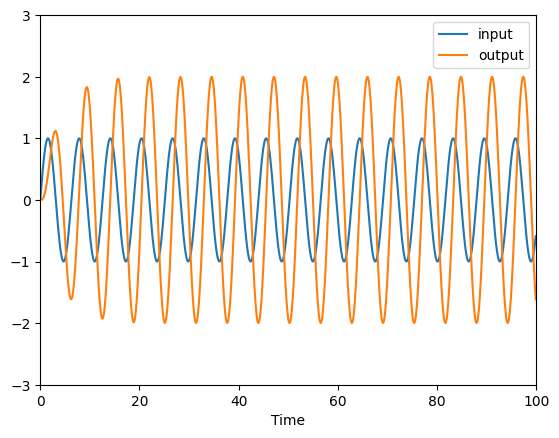

In [17]:
omega = 1   # 0.1 ~ 10
t = np.arange(0,100,0.1)
u = np.sin(omega*t)
t,y = ctl.forced_response(G, t, u)
input = plt.plot(t,u)
output = plt.plot(t,y)
plt.xlabel('Time')
plt.legend(['input','output'])
plt.axis([0, 100, -3, 3])
plt.show()

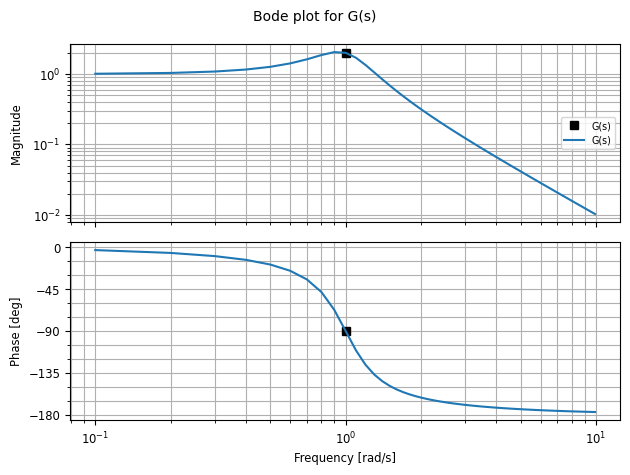

In [18]:
current_omega = ctl.bode(G,omega,'ks')
overall = ctl.bode(G,np.arange(0.1,10,0.1))
plt.show()

### Bandwidth (Cut-off frequency) 확인

In [19]:
ctl.bandwidth(G)

1.4839084518312828

In [21]:
ctl.bandwidth(G, -10)

2.0000000000008864

### 좀 더 복잡한 Bode plot 그리기

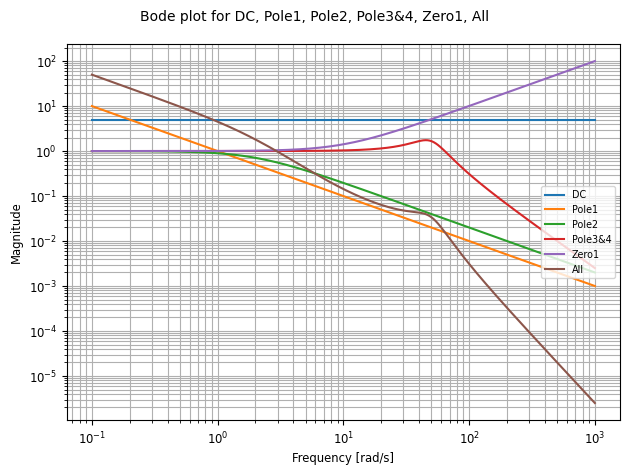

In [27]:
G_dc = ctl.tf([5],[1])
G_dc.name = 'DC'
G_p1 = 1/s
G_p1.name = 'Pole1'
G_p2 = 1/(0.5*s+1)
G_p2.name = 'Pole2'
G_p34 = 1/(s**2/2500+s*0.6/50+1)
G_p34.name = 'Pole3&4'
G_z1 = 0.1*s+1
G_z1.name = 'Zero1'
G_all = G_dc*G_p1*G_p2*G_p34*G_z1
G_all.name = 'All'
G_list = [G_dc, G_p1, G_p2, G_p34, G_z1, G_all]
out = ctl.bode(G_list, plot_phase=False)



In [31]:
for sys in G_list:
  print(sys.name, ctl.bandwidth(sys))

DC inf
Pole1 nan
Pole2 1.9952566902229083
Pole3&4 72.6529421994053
Zero1 inf
All nan
